In [1]:
from pandas_profiling import ProfileReport

In [2]:
df=pd.read_csv(r'C:\Users\owner\OneDrive\Desktop\Data sets\cubic_zirconia.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df=pd.read_csv(r'C:\Users\owner\OneDrive\Desktop\Data sets\cubic_zirconia.csv', index_col=0)

<IPython.core.display.Javascript object>

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
profile = ProfileReport(df, title='Diamond Price Report', explorative=True)

In [7]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

This shows that there is good relationship between price and carat,x,y,z.

In [8]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [9]:
df.shape

(26967, 10)

In [10]:
df=df.dropna()

In [11]:
df.shape

(26270, 10)

In [12]:
df.describe()

,carat,depth,table,x,y,z,price
count,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000
mean,0.797995,61.745147,57.456011,5.729167,5.732967,3.536636,3937.973734
std,0.477214,1.412860,2.230776,1.127515,1.166330,0.699335,4022.189341
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5361.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


<IPython.core.display.Javascript object>

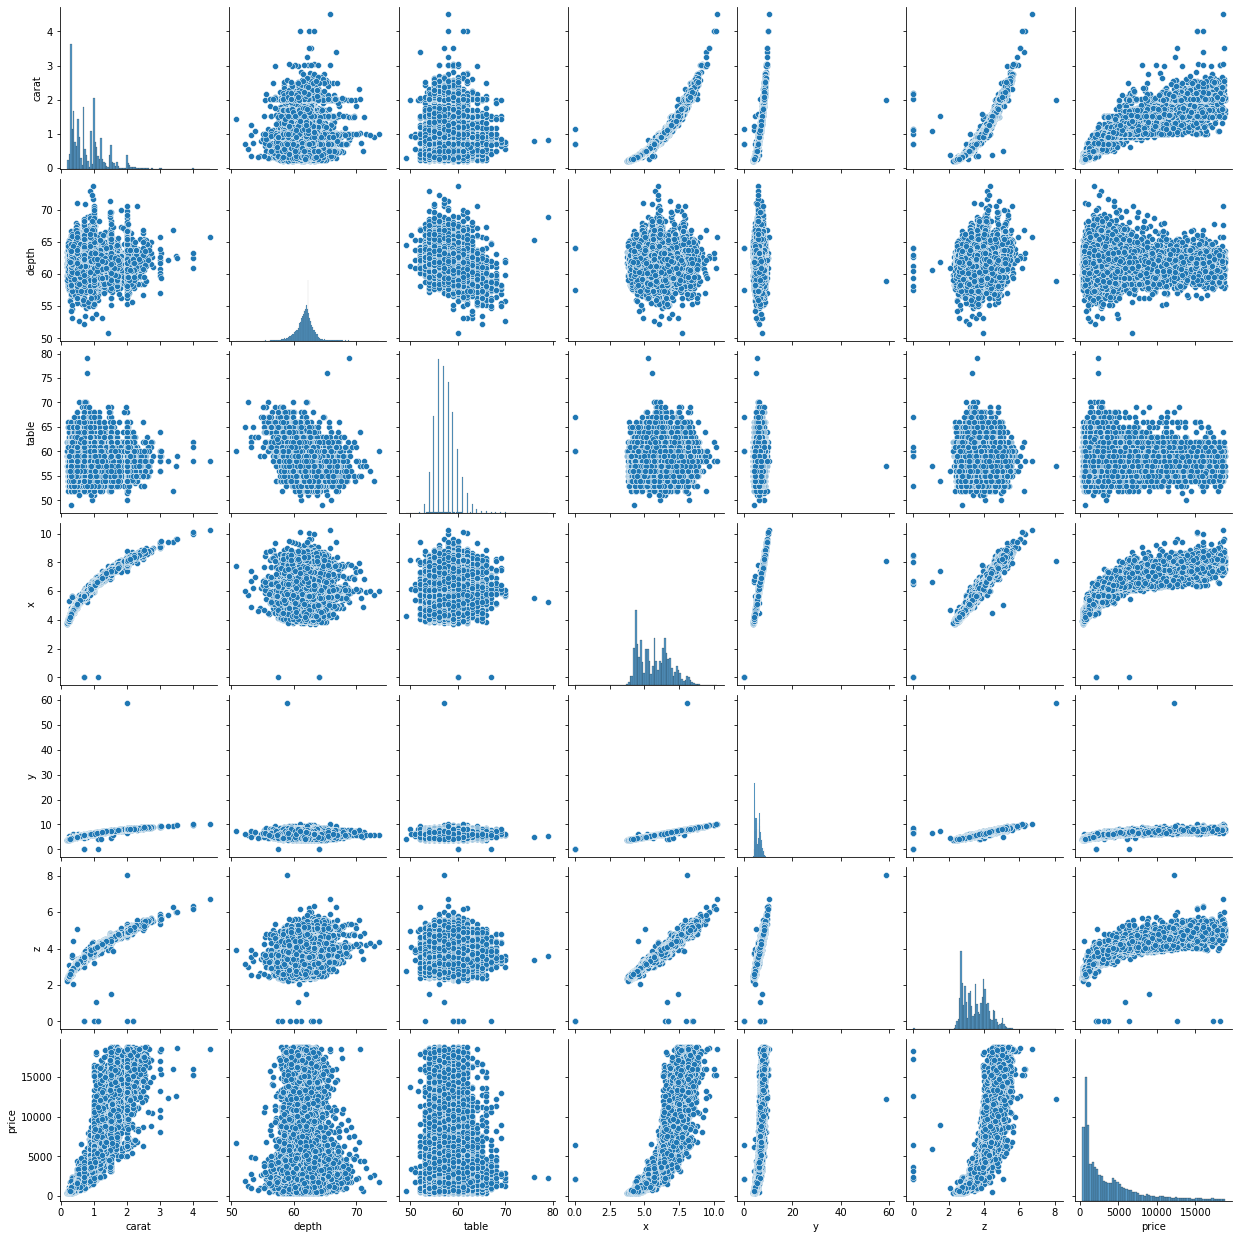

In [13]:
sns.pairplot(df)

There are some outliers in x,y,z. So we will remove it.


In [14]:
df.describe()

,carat,depth,table,x,y,z,price
count,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000
mean,0.797995,61.745147,57.456011,5.729167,5.732967,3.536636,3937.973734
std,0.477214,1.412860,2.230776,1.127515,1.166330,0.699335,4022.189341
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5361.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


minimum value of x,y,z can't be zero. 

In [15]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

now we will drop outliers

In [16]:
df = df[(df["x"]<10)&(df["z"]>2)]
df = df[(df["y"]<20)]
df = df[(df["z"]<10)]

<IPython.core.display.Javascript object>

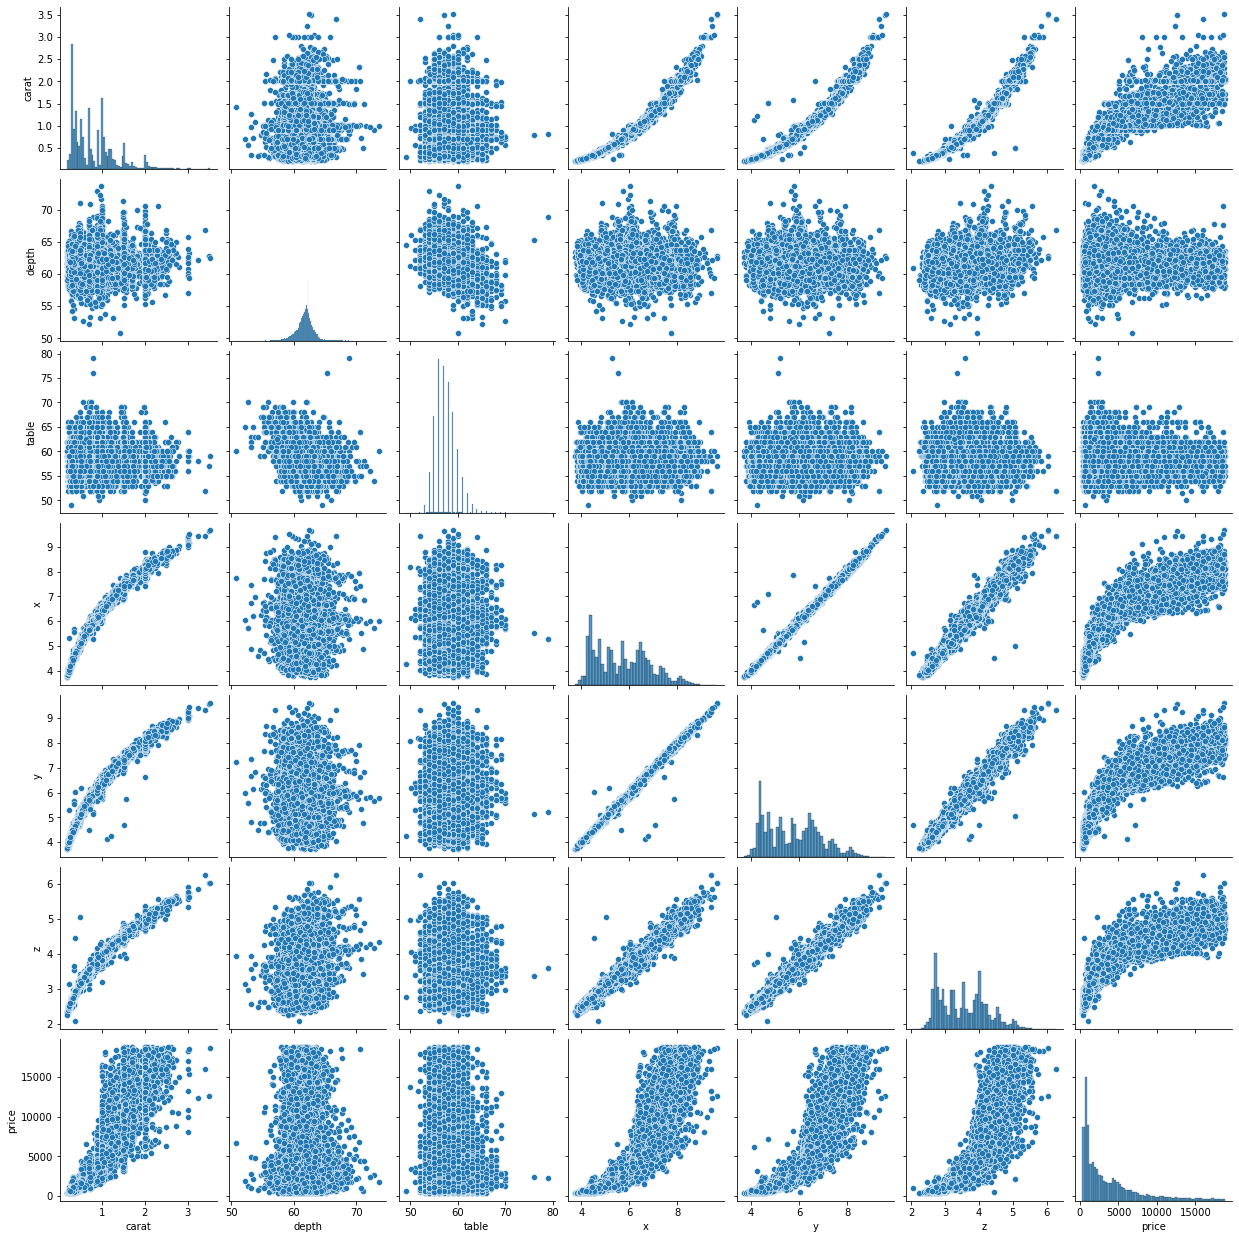

In [17]:
sns.pairplot(df)

Now it is showing good relationship between price and carat,x,y,z.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26254 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26254 non-null  float64
 1   cut      26254 non-null  object 
 2   color    26254 non-null  object 
 3   clarity  26254 non-null  object 
 4   depth    26254 non-null  float64
 5   table    26254 non-null  float64
 6   x        26254 non-null  float64
 7   y        26254 non-null  float64
 8   z        26254 non-null  float64
 9   price    26254 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.2+ MB


although depth and table columns are not showing any strong correlation, but still we will keep it.

now we will convert cut,color,clarity from object to numerical

In [19]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [20]:
order_label_cut={'Ideal':5, 'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1}

In [21]:
df['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [22]:
order_label_color={'E':2, 'G':4, 'F':3, 'D':1, 'H':5, 'J':7, 'I':6}

In [23]:
df['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [24]:
order_label_clarity={'SI1':6, 'IF':1, 'VVS2':3, 'VS1':4, 'VVS1':2, 'VS2':5, 'SI2':7, 'I1':8}

now we have labeled each cut, color and clarity as per their orders

In [25]:
df['cut_enc']=df['cut'].map(order_label_cut)
df['color_enc']=df['color'].map(order_label_color)
df['clarity_enc']=df['clarity'].map(order_label_clarity)


In [26]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,cut_enc,color_enc,clarity_enc
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,5,2,6
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,4,4,1
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,3,2,3
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,5,3,4
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,5,3,2


In [27]:
df1=df.drop(['cut','color','clarity'], axis=1)

In [28]:
df1.head()

,carat,depth,table,x,y,z,price,cut_enc,color_enc,clarity_enc
1,0.30,62.1,58.0,4.27,4.29,2.66,499,5,2,6
2,0.33,60.8,58.0,4.42,4.46,2.70,984,4,4,1
3,0.90,62.2,60.0,6.04,6.12,3.78,6289,3,2,3
4,0.42,61.6,56.0,4.82,4.80,2.96,1082,5,3,4
5,0.31,60.4,59.0,4.35,4.43,2.65,779,5,3,2


In [29]:
df1.describe()

,carat,depth,table,x,y,z,price,cut_enc,color_enc,clarity_enc
count,26254.000000,26254.000000,26254.000000,26254.000000,26254.000000,26254.000000,26254.000000,26254.000000,26254.000000,26254.000000
mean,0.797213,61.745277,57.455070,5.728571,5.730454,3.537416,3934.277786,3.910185,3.601204,4.943590
std,0.475264,1.412187,2.229815,1.124362,1.116213,0.694761,4017.810404,1.113048,1.704648,1.647293
min,0.200000,50.800000,49.000000,3.730000,3.710000,2.060000,326.000000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000,3.000000,2.000000,4.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000,4.000000,4.000000,5.000000
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000,5355.750000,5.000000,5.000000,6.000000
max,3.510000,73.600000,79.000000,9.660000,9.630000,6.270000,18818.000000,5.000000,7.000000,8.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

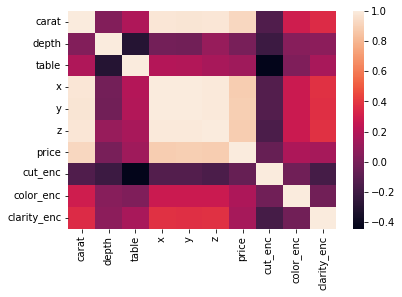

In [30]:
corr_df1=df1.corr()
sns.heatmap(corr_df1)

<IPython.core.display.Javascript object>

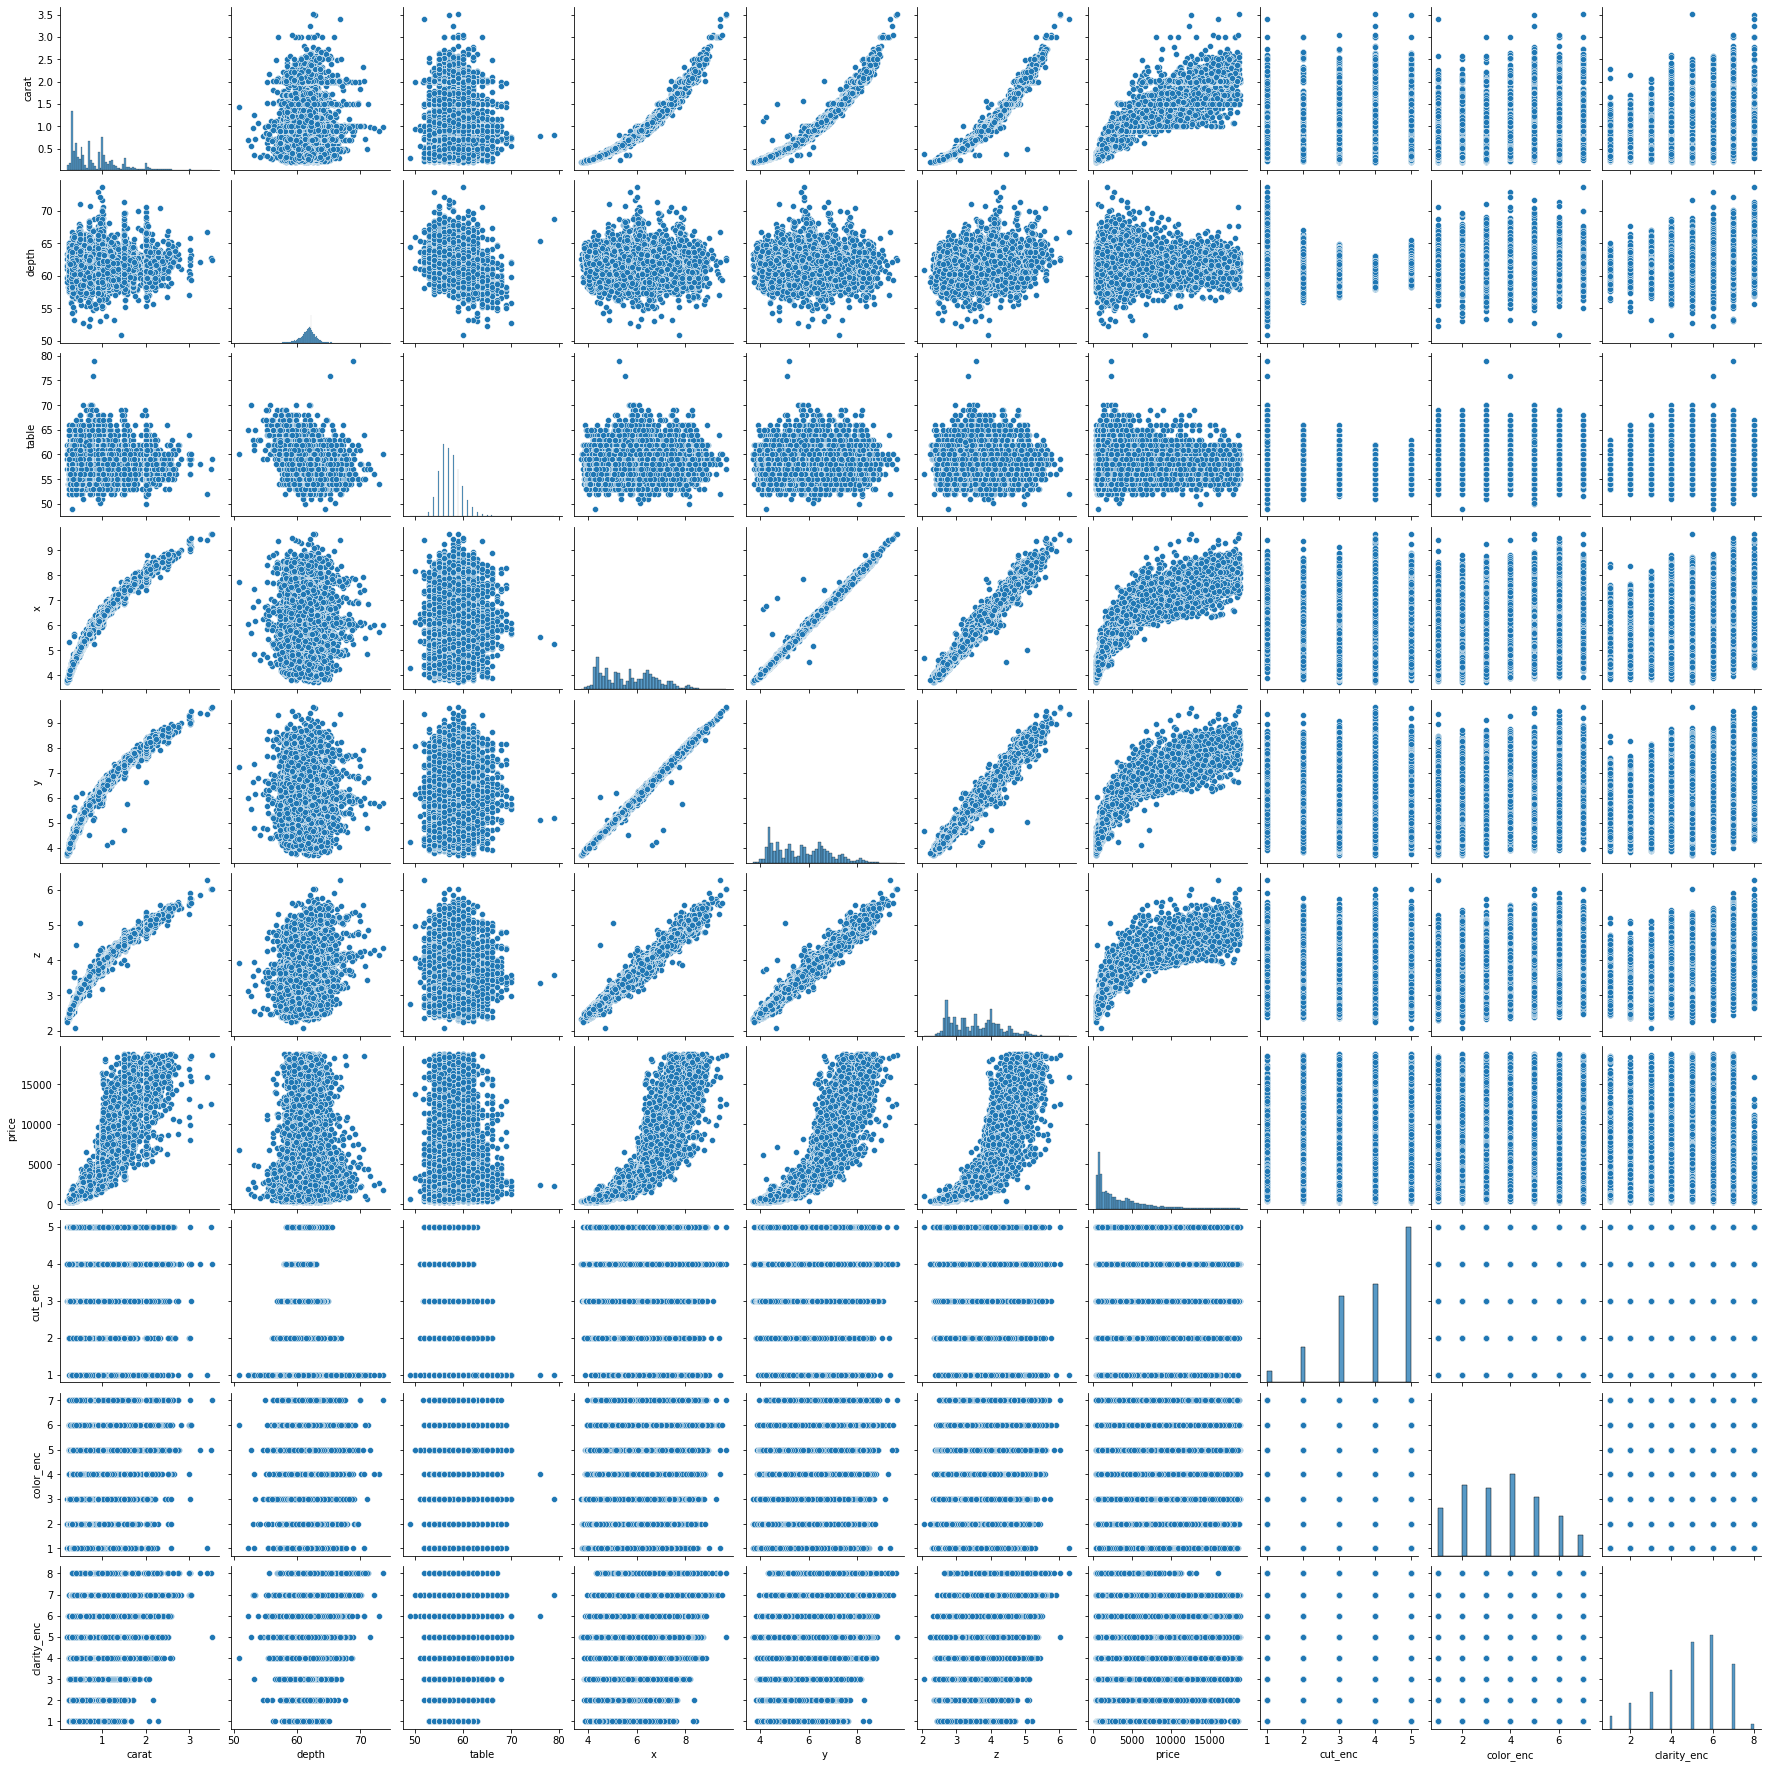

In [31]:
sns.pairplot(df1)

In [32]:
df1.isnull().sum()

carat          0
depth          0
table          0
x              0
y              0
z              0
price          0
cut_enc        0
color_enc      0
clarity_enc    0
dtype: int64

In [33]:
profile1 = ProfileReport(df1, title='Diamond Price Report', explorative=True)

In [34]:
profile1.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
X= df1.drop(["price"],axis =1)
y= df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=8)

<IPython.core.display.Javascript object>

In [38]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [40]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]


pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [42]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1190.649000 
DecisionTree: -765.452763 
RandomForest: -565.675878 
KNeighbors: -770.627592 
XGBRegressor: -563.267698 


XBGReegressor gives the best results

In [43]:
pred = pipeline_xgb.predict(X_test)

In [44]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9806876485087508
Adjusted R^2: 0.9806611286486011
MAE: 285.9114909430672
MSE: 315475.6333425913


<IPython.core.display.Javascript object>

RMSE: 561.6721760445245
